# Individual Planning Report (MineCraft Project)



##### Name: Abrahem Chaudhry

###### Student ID: 201150693

## **Data Description**

### ****Files****

**players.csv:** one row per unique player with demographic and account attributes (see Players Table below).
**sessions.csv:** one row per play session with timing and session-level attributes(See Sessions Table below)
#### How data were collected
Players join a dedicated MineCraft server. Server-side logging captures session metadata (start/end or duration) and links each session to a player identifier. Demographics are collected at registration or via linked profiles. Potential issues include incomplete self-reported demographics, missing sessions for players who churned early, and clock/timezone inconsistencies when deriving durations. All data is collected from DSCI100 materials in canvas and loaded into a R software on JupyterNotebooks. A repository is made to store and manage the the 2 datasets, and the Jupyter Notebook.

#### **High‑level size overview**

**players.csv:** 196 rows, 7 columns

**sessions.csv:** 1535 rows, 5 columns

In [8]:
library(readr)
library(dplyr)
library(janitor)
library(tidyverse)

players <- read_csv('players.csv')
sessions <- read_csv('sessions.csv')





Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Data: Players *(players.csv)*

In [13]:
head(players)
summary(players)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

### Players Variable Descriptions

| Variable   | Type      | Description                                |
| ----------- | --------- | ------------------------------------------ |
| Experience  | Character   | Level of experience player is at in gaming terms        |
| Age        | Numeric   | Age of the player in years                 |
| Hashed Email | Character  | Encrypted or anonymized identifier for each user 
| Name      | Character   | Name of the person data belongs to              |
| Gender     | Character | Player’s self-reported gender              |
| Subscribe    | Character | True/False: Has the player subscribed or not? |
| Played hours | Numeric   | Total minutes played        |

* The dataset contains 196 player records with variables describing experience level, subscription status, gender, age, and total hours played. The average age of players is 21.14 years, ranging from 9 to 58, while the mean number of hours played is 5.85, with a maximum of 223.1, suggesting a few extreme outliers. Most players have relatively low playtime, and the dataset includes both subscribed and unsubscribed users, as well as multiple experience levels (e.g., Pro, Amateur, Veteran). Minor issues include inconsistent variable naming (e.g., “Age” vs. lowercase variables) and missing values in the age column. The data will either be log scaled when making grapghs or scaled in wrangling.

### Summary Statistics

| Variable      | Mean  |  Min  |Max|
|----------------|-------|-----|--- |
| Hours Played   | 5.85 | 0.00| 223.10|
| Age(years)            | 21.14 |9.00| 58 |


* There are potential outliers, such as played_hours values reaching 223 while most are near 0–2 hours. The age range of 9 to 58 suggests either data entry errors or the inclusion of minors, which could raise ethical concerns. Hidden issues may include missing values in gender or experience, inconsistent category formatting (e.g., “Male” vs. “male”), and duplicate users masked by the anonymized hashedEmail field. To improve data quality, variable names should be standardized, missing and extreme values identified, and logical relationships (such as older players typically having more experience) verified.

## Data: Sessions *(sessions.csv)*

In [24]:
head(sessions)
summary(sessions)

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

### Sessions Variable Descriptions

| Variable            | Type      | Description                                      |
|----------------------|-----------|--------------------------------------------------|
| Hashed Email          | Character | Encrypted or anonymized identifier for each user |
| Start Time         | Character | Recorded session start time date format|
| End time             | Character | Recorded session end time date format|
| original start time  | Numeric   | Original session start time numeric format|
| original end time    | Numeric   | Original session end time numeric format|

* The dataset appears mostly clean, but there are a few issues to note. Both start time and end  time are stored as character strings instead of proper date-time objects, which may cause problems when calculating durations or filtering by time. The numeric equivalents, original start time and original end time, are recorded as large Unix timestamps (~1.7e+12), which can introduce rounding or conversion errors if not handled carefully.

### Summary Statistics

| Variable            | Mean          |
|----------------------|---------------|
| original start time  | 1.719201e+12  |
| original end time    | 1.719196e+12  |


* Hidden issues could include missing timestamps, duplicate session records for the same hashedEmail, or time zone inconsistencies that distort time comparisons. Standardizing date-time formats, verifying time order, and checking for missing or overlapping entries would improve data accuracy.

## Question of Interest


* **Specific Question:**
 Which player ages or experience levels are associated with contributing higher total playtime, and how does this relate to their likelihood of subscribing?

This project aims to identify the demographic and experiential characteristics of players who are the highest data contributors to optimize future recruitment efforts. The core analysis will determine which player ages or experience levels are associated with the highest total playtime, and how this behavioral pattern correlates with newsletter subscription. To prepare the players.csv dataset, I will first perform essential data wrangling by converting categorical variables (like subscribed and experience_level) into factors and creating a binary outcome variable to define "high playtime contributors". Finally, relationships between these factors will be explored through visualization and, later, advanced predictive methods like kNN, requiring the normalization or scaling of quantitative predictors such as age and total minutes.(The CSV file for players is only file used)

In [79]:
players_clean <- players |>
  clean_names() |>
  mutate(experience_level = as.factor(experience),
    subscribe = as.factor(subscribe)
  )

glimpse(players_clean)

Rows: 196
Columns: 8
$ experience       <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "A…
$ subscribe        <fct> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRU…
$ hashed_email     <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee97…
$ played_hours     <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.…
$ name             <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Ad…
$ gender           <chr> "Male", "Male", "Male", "Female", "Male", "Female", "…
$ age              <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22…
$ experience_level <fct> Pro, Veteran, Veteran, Amateur, Regular, Amateur, Reg…


#### Visualizations

A log10 transformation of the y-axis was used since the distribution of played hours was extremely right-skewed, with many participants having very little playtime and a small number having substantially higher values. By lessening the impact of extreme values and more clearly displaying group differences, this scale enhances interpretability. So this is applied to all grapghs.


Warning message in scale_y_log10(labels = scales::label_comma()):
“log-10 transformation introduced infinite values.”
Warning message in scale_y_log10(labels = scales::label_comma()):
“log-10 transformation introduced infinite values.”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 87 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


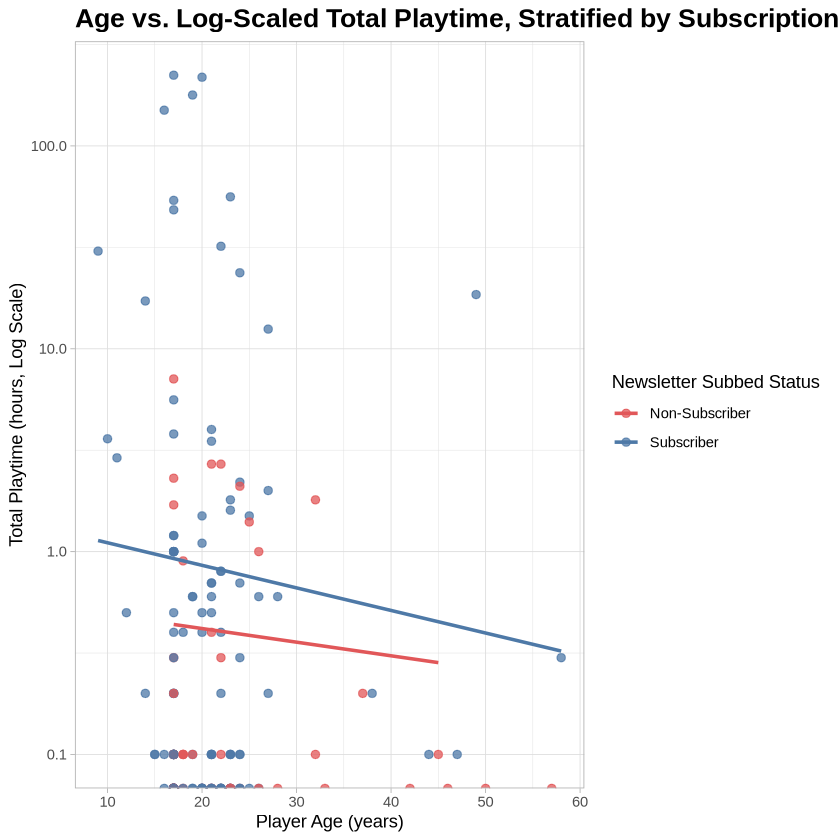

In [85]:


ggplot(players_clean, aes(x = age, y = played_hours, color = subscribe)) +
  geom_point(alpha = 0.75, size = 2) + 
  # Separate trend lines (colored by subscriber status)
  geom_smooth(method = "lm", se = FALSE) + 
  
  scale_color_manual(
    values = c("FALSE" = "#E15759", "TRUE" = "#4E79A7"),
    labels = c("FALSE" = "Non-Subscriber", "TRUE" = "Subscriber"),
    name = "Newsletter Subbed Status"
  ) +
  scale_y_log10(labels = scales::label_comma())+
  labs(
    title = "Age vs. Log-Scaled Total Playtime, Stratified by Subscription Status",

    x = "Player Age (years)",
    y = "Total Playtime (hours, Log Scale)"
  ) +
  theme_light() +
  
  # Further aesthetic tuning (optional but adds polish)
  theme(
    plot.title = element_text(face = "bold", size = 16),
    legend.position = "right"
  )

##### Figure 1

There are clear differences between subscribers and non-subscribers in the stratified scatterplot of age versus log-scaled total playtime. While subscribers have a broader distribution and more high-playtime outliers across all age categories, the majority of playtime values for both groups remain modest. Although the association is stronger among subscribers, whose trendline starts higher and diminishes at a slightly quicker pace, the downward linear trends show that overall playtime decreases somewhat with age in both categories. This implies that while older users, regardless of subscription, tend to accrue noticeably less playtime. These variations support the finding that more involvement, particularly among younger players, is associated with subscription behavior.

Warning message in scale_y_log10(labels = scales::label_comma()):
“log-10 transformation introduced infinite values.”
Warning message in scale_y_log10(labels = scales::label_comma()):
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 85 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


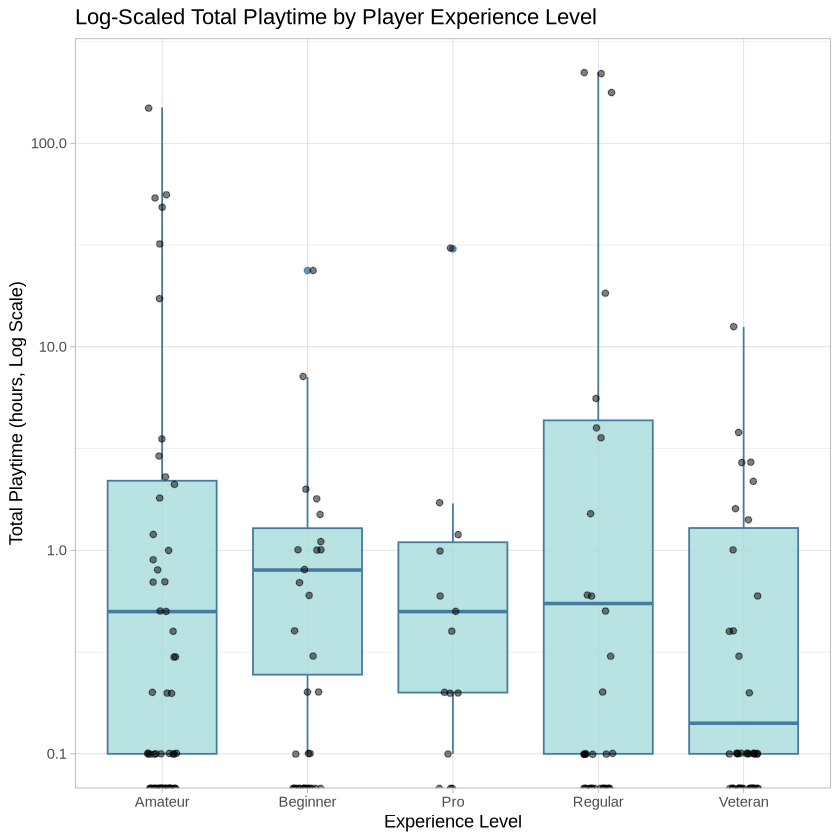

In [89]:

ggplot(players_clean, aes(x = experience, y = played_hours)) +

  geom_boxplot(
    fill = "#A8DADC",
    color = "#457B9D",
    alpha = 0.8
  ) +
  # Jittered points with a semi-transparent dark color
  geom_jitter(
    width = 0.1, 
    alpha = 0.5, 
    size = 1.5,
    color = "black" 
  ) + scale_y_log10(labels = scales::label_comma())+
  labs(
    title = "Log-Scaled Total Playtime by Player Experience Level",
    x = "Experience Level",
    y = "Total Playtime (hours, Log Scale)"
  ) +
  theme_light()
  


##### Figure 2

The log-scaled boxplot shows that Amateur and Beginner players have the lowest and most tightly clustered playtimes, while Regular and Veteran players display the widest variability, including several extremely high playtime values. Pro players do not show the highest engagement, suggesting that expertise alone does not predict hours played. Overall, experience level is associated with differences in playtime, but the relationship is not strictly linear.In general, the distribution of playtime does not rise uniformly with experience level, rather, regular and veteran players exhibit the most diversity. These findings imply that experience affects engagement patterns, but not in a straightforward linear fashion. Some players with a lot of experience put in a lot of hours, while others play very little. This supports the idea that individual play style and experience, rather than experience alone, affect overall involvement.

Warning message in scale_y_log10(labels = scales::label_comma()):
“log-10 transformation introduced infinite values.”
Warning message in scale_y_log10(labels = scales::label_comma()):
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 85 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


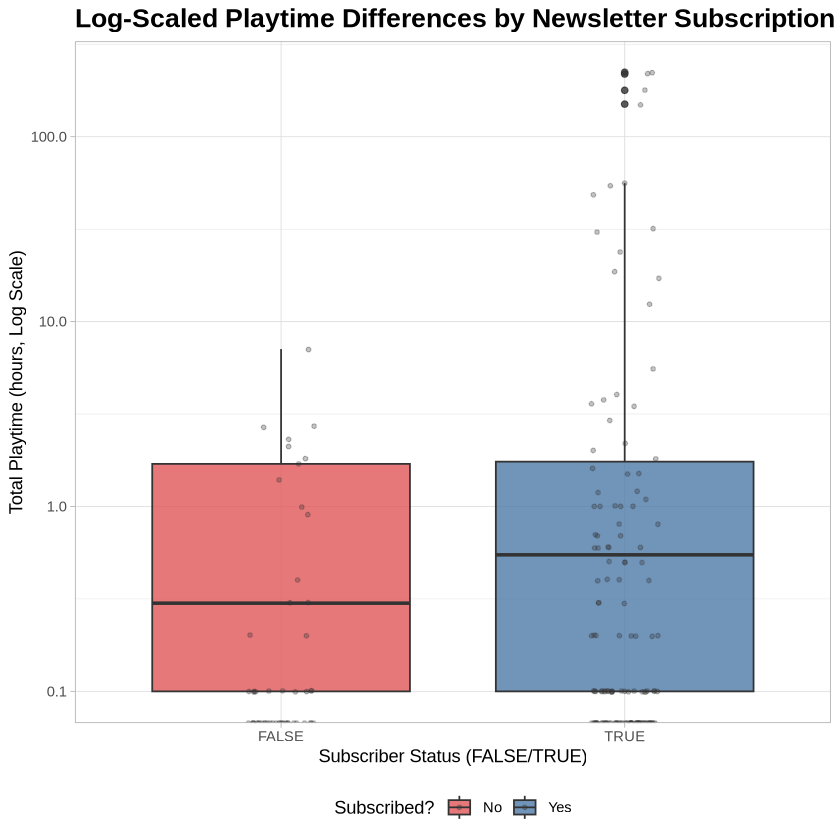

In [90]:


ggplot(players_clean, aes(x = subscribe, y = played_hours, fill = subscribe)) +
  geom_boxplot(alpha = 0.8, color = "gray20") +
  # Use manual scale for consistent, high-contrast colors across all plots
  scale_fill_manual(
    values = c("FALSE" = "#E15759", "TRUE" = "#4E79A7"), 
    labels = c("FALSE" = "No", "TRUE" = "Yes"),
    name = "Subscribed?"
  ) +

  geom_jitter(width = 0.1, alpha = 0.3, color = "gray20", size = 1) + 
  scale_y_log10(labels = scales::label_comma()) + # Log scale is essential
  labs(
    title = "Log-Scaled Playtime Differences by Newsletter Subscription Status",
    x = "Subscriber Status (FALSE/TRUE)",
    y = "Total Playtime (hours, Log Scale)"
  ) +
  theme_light() + 
  theme(
    plot.title = element_text(face = "bold", size = 16),
    legend.position = "bottom" # Move legend to bottom
  )


##### Figure 3

The log-scaled boxplot comparing subscribers and non-subscribers reveals clear differences in total playtime between the two groups. Subscribers show a noticeably higher median playtime than non-subscribers, even after adjusting for the right-skewed distribution of hours played. While both groups contain many low-playtime users, the subscriber group displays a much broader upper range, including numerous mid- and high-playtime outliers, with some players exceeding 50–100 hours. In contrast, non-subscribers rarely exceed 5–10 hours, and most of their values cluster near the lower end of the scale.

These patterns indicate that subscription status is strongly associated with higher overall engagement. Players who subscribe tend to not only play more on average but also show a wider variety of high-playtime behavior, suggesting that subscribing is more common among highly active or dedicated users. This supports the idea that total playtime is a key factor related to subscription likelihood.

### Methods and Plan

I will employ a K-nearest neighbours (KNN) classification model to answer the question, "Which player ages or experience levels are associated with contributing higher total playtime, and how does this relate to their likelihood of subscribing?" This approach is suitable as this is a supervised classification task and the response variable, subscribe, is binary (TRUE/FALSE). These characteristics may be useful indicators of subscription behavior, as the exploratory visualizations showed distinct patterns in playtime across age and experience groups as well as disparities between subscribers and non-subscribers. KNN is a versatile, non-parametric technique that does not require assumptions about linearity between variables and performs well with datasets that contain both numerical predictors (like age and played hours) and categorical predictors (like experience level, once encoded). 

KNN requires that the feature space accurately depict "similarity" among players, although it makes few modeling assumptions. This suggests that in order to prevent one attribute (such played hours, which is extremely skewed) from dominating distance estimates, variables must be on comparable scales. Therefore, before the model is trained, all numerical variables will be normalized. The clustering of high-playtime subscribers in the exploratory analysis is consistent with KNN's assumption that spatially comparable players will have similar subscription behavior. KNN has a number of drawbacks despite its simplicity. First, the choice of k affects how well the model performs; a small k could overfit noise, while a big k could oversmooth significant player differences. Additionally, KNN is less successful when highly correlated or irrelevant predictors introduce noise into distance calculations, and it performs poorly with severely unbalanced classes. 

I will evaluate multiple values of k (e.g., k = 3, 5, 7, 9, 11) using k-fold cross-validation on the training dataset. The final value of k will be selected based on the highest cross-validated accuracy to ensure the model balances bias and variance appropriately. After preprocessing, the dataset will be divided at random into 70% training data and 30% testing data. To prevent information leakage, cross-validation will only take place within the training set. The final model will be tested on the test set to evaluate its generalization performance after the optimal k value has been found.This modeling strategy guarantees a methodical approach to determining the relationship between player attributes and subscription likelihood and offers a predictive framework consistent with the trends found in the exploratory investigation.




## Conclusion

Exploratory analysis shows that players with greater engagement are more likely to subscribe. This pattern is especially visible among younger players and among those with more experience, such as Regular or Veteran groups. Subscribers also show higher total playtime and greater variation in their playtime. These observations indicate that the relationship between engagement and subscription is not simply linear.

KNN is the most appropriate predictive model for this project because the outcome of interest, which is subscription status, is binary and the dataset is small. The relationships between age, experience level, and total playtime also appear non linear. KNN makes very few assumptions about how the data are distributed, so it can handle the skewed playtime values more effectively than linear models. After the numeric features are scaled and the categorical variables are encoded, the method can compare each player to the most similar known cases. This allows the model to identify which combinations of characteristics align with subscription behavior. Through this approach, the analysis directly links patterns in age and experience to the likelihood of subscribing.